Results found in file a-0.png


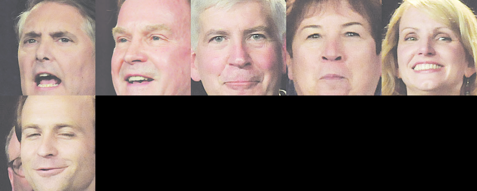

Results found in file a-3.png


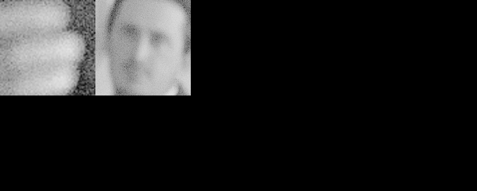

In [3]:
import PIL
import zipfile
from PIL import Image
from PIL import ImageDraw
import cv2 as cv
import numpy as np
import pytesseract

#ML models that can be trained to detect faces
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
#face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
#eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

##Binarization function can written manually, see below for function
def binn(image_convert, thresh_val):
    #convert to black and white
    op_image=image_convert.convert('L')
    # the inspects the image pixel by pixel to determine if the threshold us met
    for x in range(op_image.width):
        for y in range(op_image.height):
            # if pixel<threshvalue, the pixel is zeroed
            if op_image.getpixel((x,y))<thresh_val:
                op_image.putpixel((x,y), 0)
                
            else:
                op_image.putpixel((x,y), 255)
    return op_image


# create a contact sheet from different brightnesses
def contact_sheet(thumbs):
    first_image=thumbs[0]
    contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*5,first_image.height*2))
    x=0
    y=0

    for thumb in thumbs:
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(thumb, (x, y) )
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+first_image.width == contact_sheet.width:
            x=0
            y=y+first_image.height
        else:
            x=x+first_image.width

    # resize and display the contact sheet
    print('Results found in file {}'.format(file))
    contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
    display(contact_sheet)

#Using zipfile module to unpack files from the zip directory using a context manager: using 'with'
with zipfile.ZipFile("small_img.zip", 'r') as rep:
    #using the namelist method to create list of files in the zipfile. This allows easier interation through the zipped directory
    lst=rep.namelist()
    for file in lst:
        with rep.open(file) as first:
            #create PIL object in order to run the pytesseract image to string method to unpack text
            img=Image.open(first)
            strng=(pytesseract.image_to_string(binn(img, 120)))
            #create list of strings unpacked from pytesseract
            strng1=strng.split()
            #search to see if desired name can be located in text list
            for i in strng1:
                if i=='Christopher':
                    #It is important to now convert the file into a form that can be read cv.imread.
                    img_cv=img.convert('L')
                    #this step ensures the file is saved in the mode that file name is saved as in this case 'png'
                    img_cv.save(file)
                    img2=cv.imread(file)
                    #You have to iterate through the integer variable in detectMultiScale. In this case 1.35 appeared to be the best option
                    faces=face_cascade.detectMultiScale(img2, 1.35)
                    p_image=Image.open(first)
                    #Crop image or identify image
                    img_lst=[]
                    # faces produces the x,y which is the top left coordinate for the bounding box for the faces
                    #w,h is the width and height as such rec has to calculated to have it in the form for crop method
                    for x,y,w,h in faces:
                        rec=[x, y, x+w, y+h]
                        img_lst.append(p_image.crop(rec).resize((191,191)))
                    contact_sheet(img_lst)